In [1]:
import matplotlib.pyplot as plt
from polynomial import Polynomial
import numpy as np

In [10]:
""" 
Functions will all be in the form of f(x+1) = f(x) implicitly
Define whatever you'd like, use np for math notation

"""

def f(x):
    
    #return 1/(1.01) * .95 * x + .2*x**(1/3)
    
    return x**2

In [11]:
""" 
Recursive formula returns the point of convergence,
the dynamic path of values, and inital values

"""

def dynamics(f, 
             init,
             dynamic_path = [],
             deltas = [],
             inits = [],
             delta_len = 10
            ):
    # passing through our lists
    dynamic_path = dynamic_path
    deltas = deltas
    inits = inits
    
    # evaluating our function and seeing the change
    val = f(init)   
    delta = abs(abs(val) - abs(init))
    
    # updating our lists
    dynamic_path.append(val)
    deltas.append(delta)
    inits.append(init)
    
    
    # checking if we have converged - avoiding recursive depth
    if delta < 0.001:
        
        inits[-1] = round(val, 4)
        
        # returning our lists and convergence value
        return round(val, 4), dynamic_path, inits
    
    
    if len(deltas) > delta_len:
    
        if deltas[-1] > deltas[-2]:
            print('divergent')
            return None, dynamic_path, inits
        
    return dynamics(f, val, dynamic_path = dynamic_path, deltas = deltas, inits=inits)

In [12]:
# setting the initial condition and calling the dynamics function

initial_condition = .9

convergence, dynamic_path, inits = dynamics(f, initial_condition)

convergence

0.0

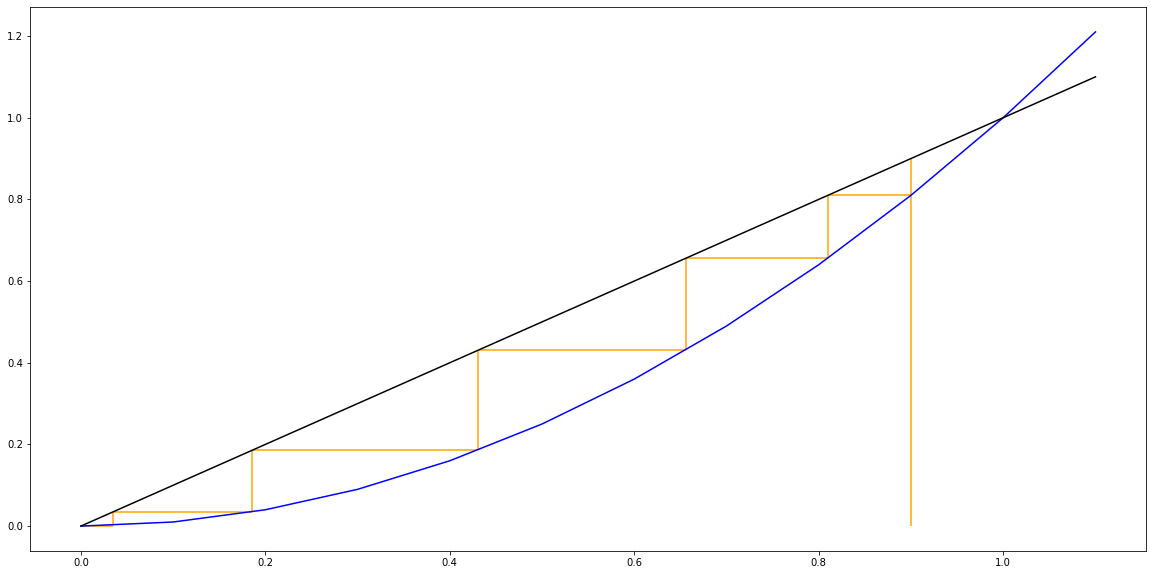

In [13]:
# plotting the phase portrait

start = min(inits) - min(inits)*.25
end = max(inits) + max(inits)*.25

fig, ax = plt.subplots(figsize=(20,10))

ax.plot([i for i in np.arange(start,end, .1)], 
        [f(i) for i in np.arange(start,end, .1)], 
        color = 'b'
       );

ax.plot([i for i in np.arange(start,end, .1)], 
        [i for i in np.arange(start,end, .1)], 
        color = 'black'
       );

ax.vlines( x = inits[0], ymin = start, ymax = f(inits[0]), color = 'orange');

for i, init in enumerate(inits):
    
    ax.vlines(x = init, ymin = init, ymax = f(init), color = 'orange')
    
    try:
        ax.hlines(y = f(init), xmin = inits[i], xmax = inits[i+1], color = 'orange');
    except:
        pass

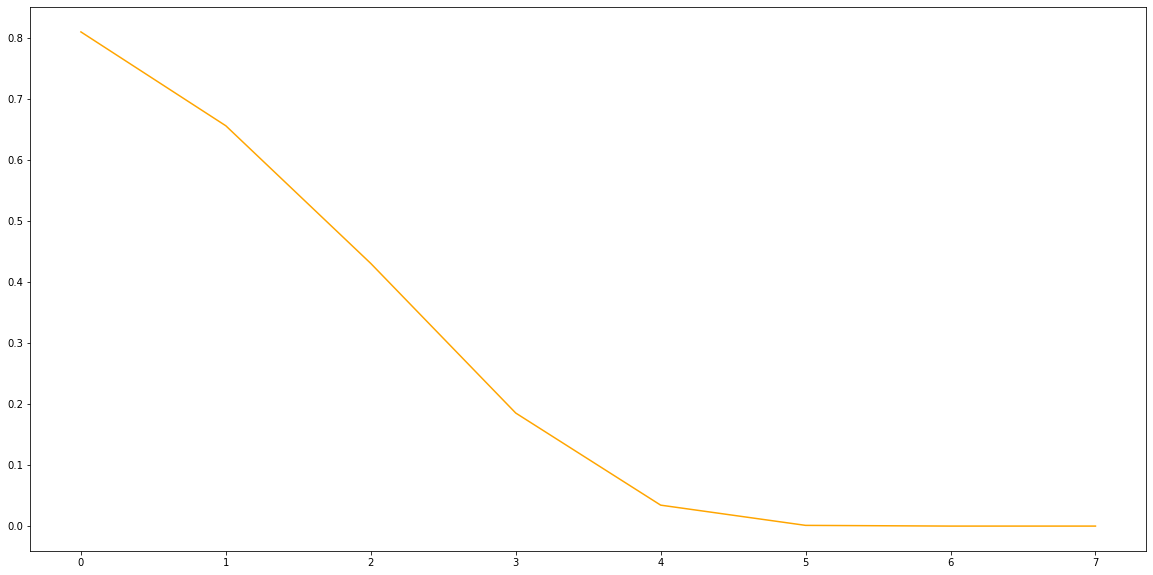

In [14]:
# plotting the dynamic path

start = min(inits) - min(inits)*.25
end = max(inits)*1.25

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(dynamic_path, color = 'orange');